In [22]:
import pandas as pd

In [23]:
data = pd.read_csv("./data/spam.csv",encoding='latin1')

In [24]:
data_copy = data.copy()

In [25]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4560,ham,Good afternoon my boytoy. How goes that walkin...,NaN,NaN,NaN
3103,ham,That's y i said it's bad dat all e gals know u...,NaN,NaN,NaN
5102,spam,This msg is for your mobile content order It h...,NaN,NaN,NaN
3672,ham,Moji just informed me that you saved our lives...,NaN,NaN,NaN
4065,ham,Fyi I'm gonna call you sporadically starting a...,NaN,NaN,NaN


In [26]:
data.shape

(5572, 5)

In [27]:
 data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [28]:
data.duplicated().sum()

np.int64(403)

In [29]:
data.drop_duplicates(inplace=True)

In [30]:
data.duplicated().sum()

np.int64(0)

In [31]:
new_df = data[['v1','v2']].copy()

In [32]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
new_df.iloc[2].v2

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [34]:
new_df['v2'].str.lower()

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: v2, Length: 5169, dtype: object

In [35]:
new_df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [36]:
new_df.sample(5)

,target,text
2886,ham,K I'll take care of it
110,ham,What is the plural of the noun research?
5018,ham,Great! How is the office today?
2532,ham,Yup ok...
944,ham,I sent my scores to sophas and i had to do sec...


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [39]:
new_df['target'] = encoder.fit_transform(new_df['target'])

In [40]:
new_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
new_df.duplicated().sum()

np.int64(0)

In [42]:
new_df.isna().sum()

target    0
text      0
dtype: int64

<h1>EDA</h1

In [43]:
import matplotlib.pyplot as plt

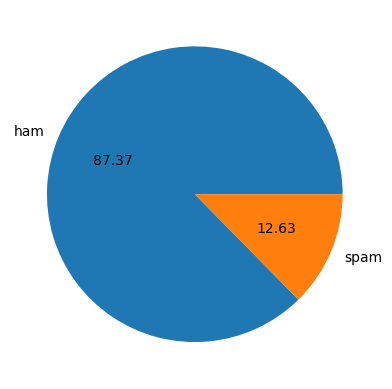

In [45]:
plt.pie(new_df['target'].value_counts() , labels=['ham','spam'],autopct = '%0.2f')
plt.show()

In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
new_df['num_characters'] = new_df['text'].apply(len)

In [58]:
new_df.sample()

,target,text,num_characters,num_words,num_sentences
1632,0,Hello my little party animal! I just thought I...,158,34,2


In [54]:
new_df['num_words'] = new_df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [57]:
new_df['num_sentences'] = new_df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [59]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

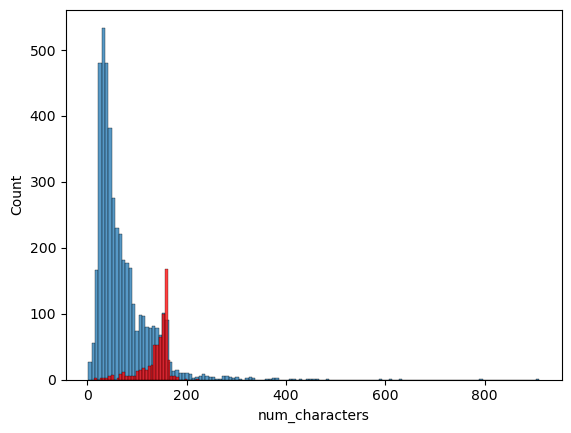

In [61]:
sns.histplot(new_df[new_df['target'] == 0]['num_characters'])
sns.histplot(new_df[new_df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

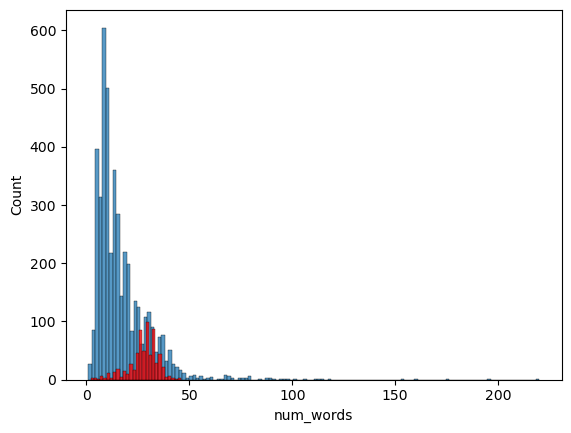

In [62]:
sns.histplot(new_df[new_df['target'] == 0]['num_words'])
sns.histplot(new_df[new_df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

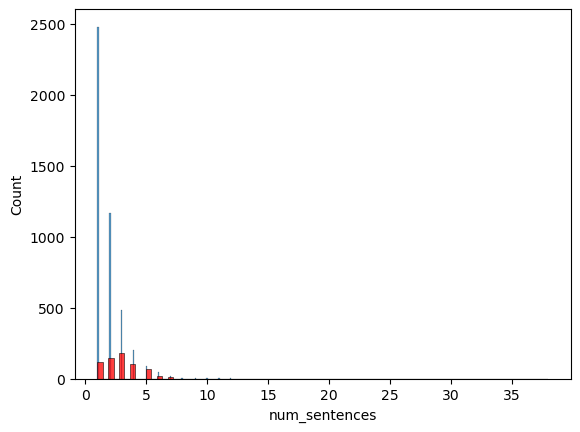

In [63]:
sns.histplot(new_df[new_df['target'] == 0]['num_sentences'])
sns.histplot(new_df[new_df['target'] == 1]['num_sentences'],color='red')

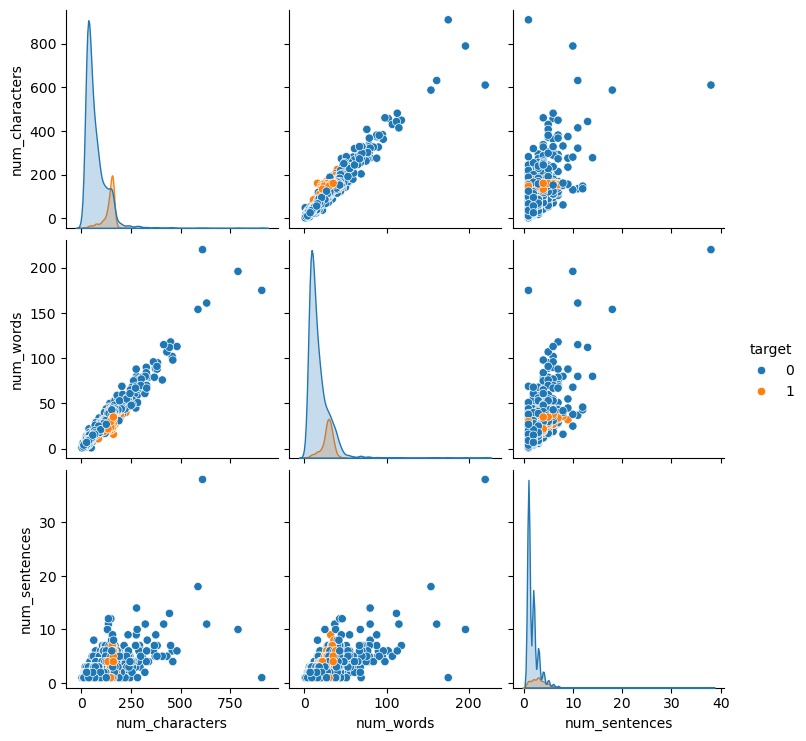

In [65]:
sns.pairplot(new_df,hue='target')

<Axes: >

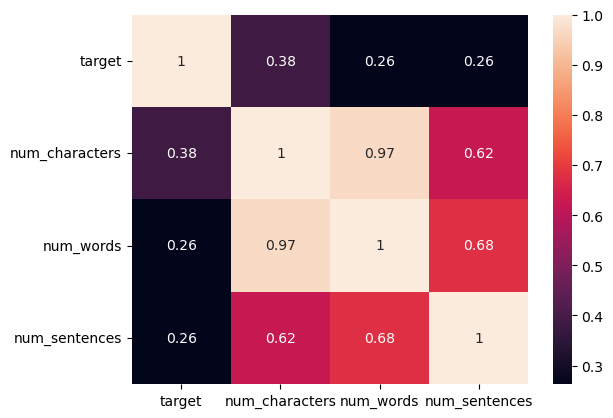

In [67]:
numeric_df = new_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)
